In [12]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

print(pd.__version__)

1.5.3


In [3]:
from vega_datasets import data

In [38]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


**1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

Ensure right data types

In [39]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

Set dates as index

In [40]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


Resample

In [41]:
df_avg = df.resample('D').mean()

Visualize

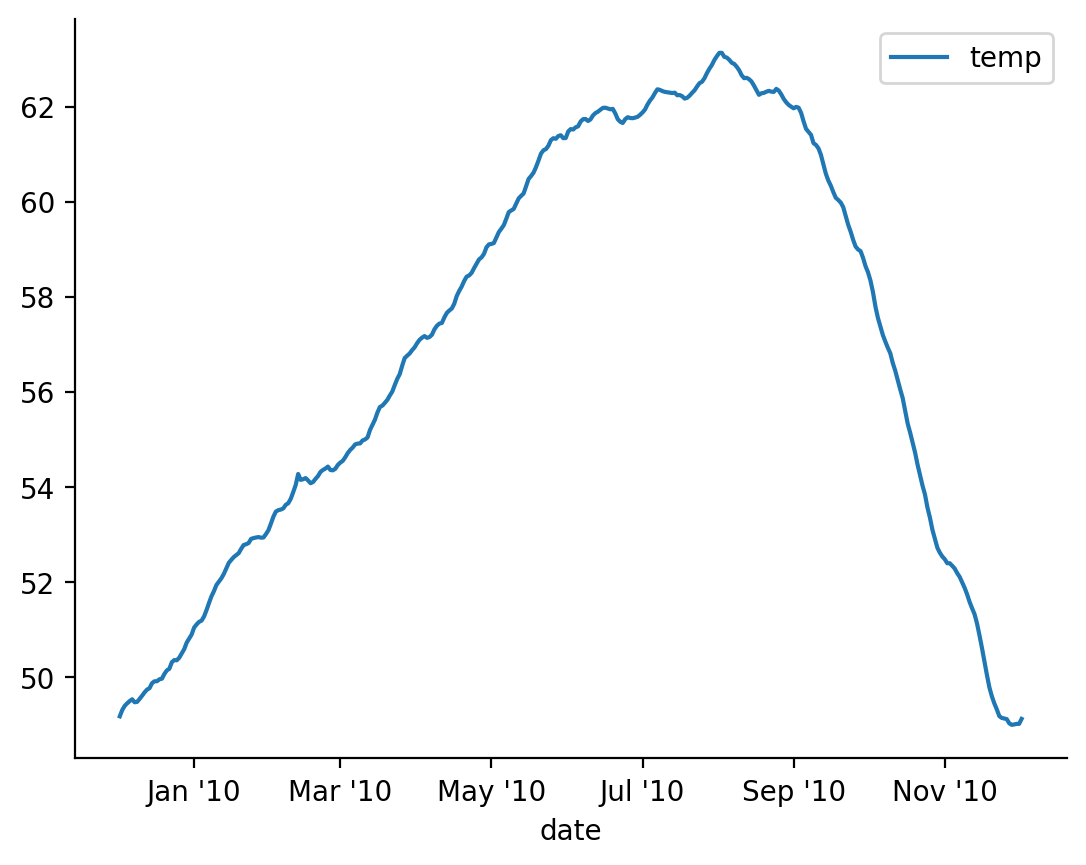

In [42]:
sns.lineplot(data=df_avg)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)

sns.despine()

**2. Write the code necessary to visualize the minimum temperature over time.**

Resample

In [43]:
df_min = df.resample('D').min()

Visualize

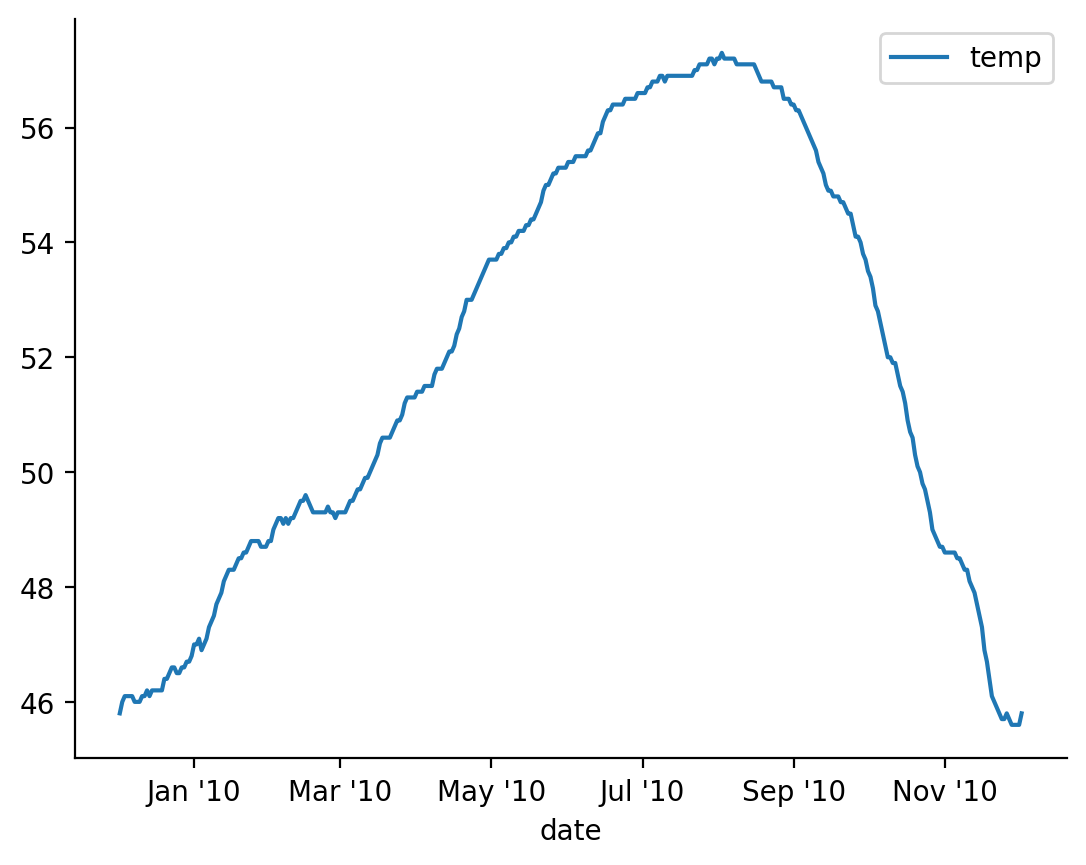

In [44]:
sns.lineplot(data=df_min)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)

sns.despine()

**3. Write the code necessary to visualize the maximum temperature over time.**

Resample

In [45]:
df_max = df.resample('D').max()

Visualize

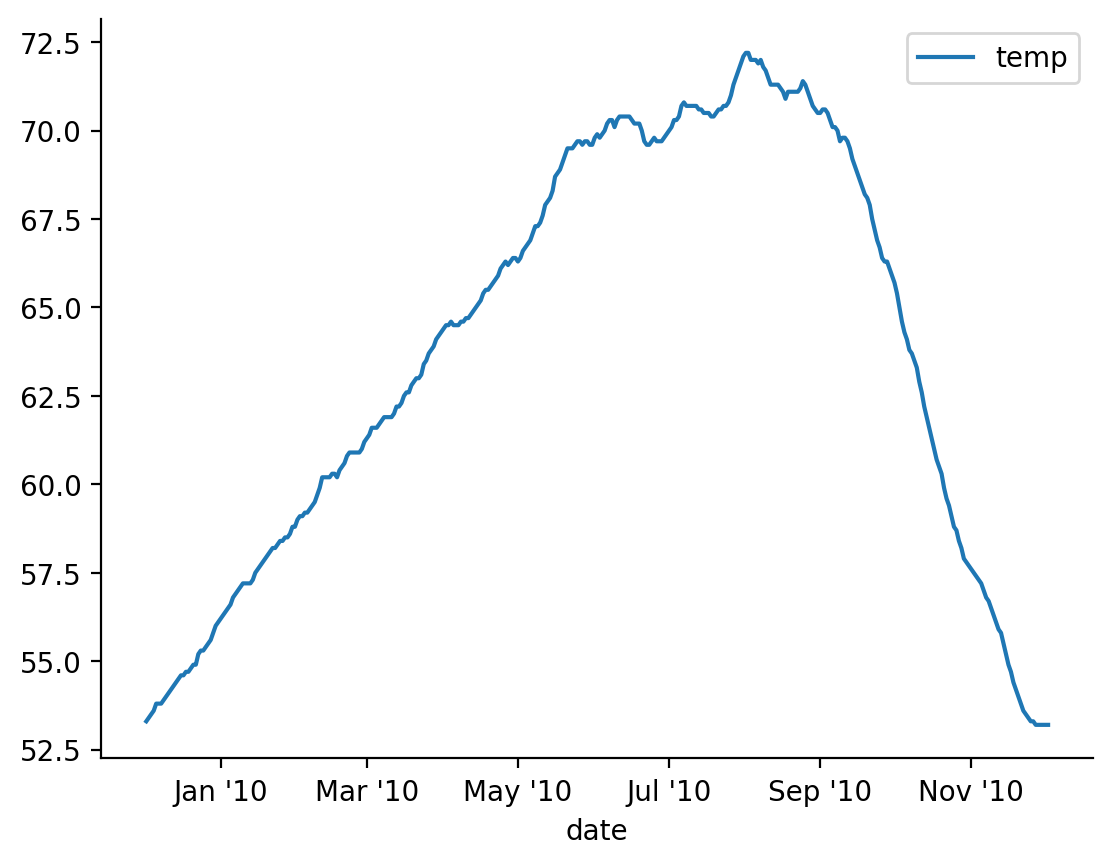

In [46]:
sns.lineplot(data=df_max)
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)

sns.despine()

**4. Which month is the coldest, on average?**
- January

Resample

In [47]:
df_monthly_avg = df.resample('M').mean()

Visualize

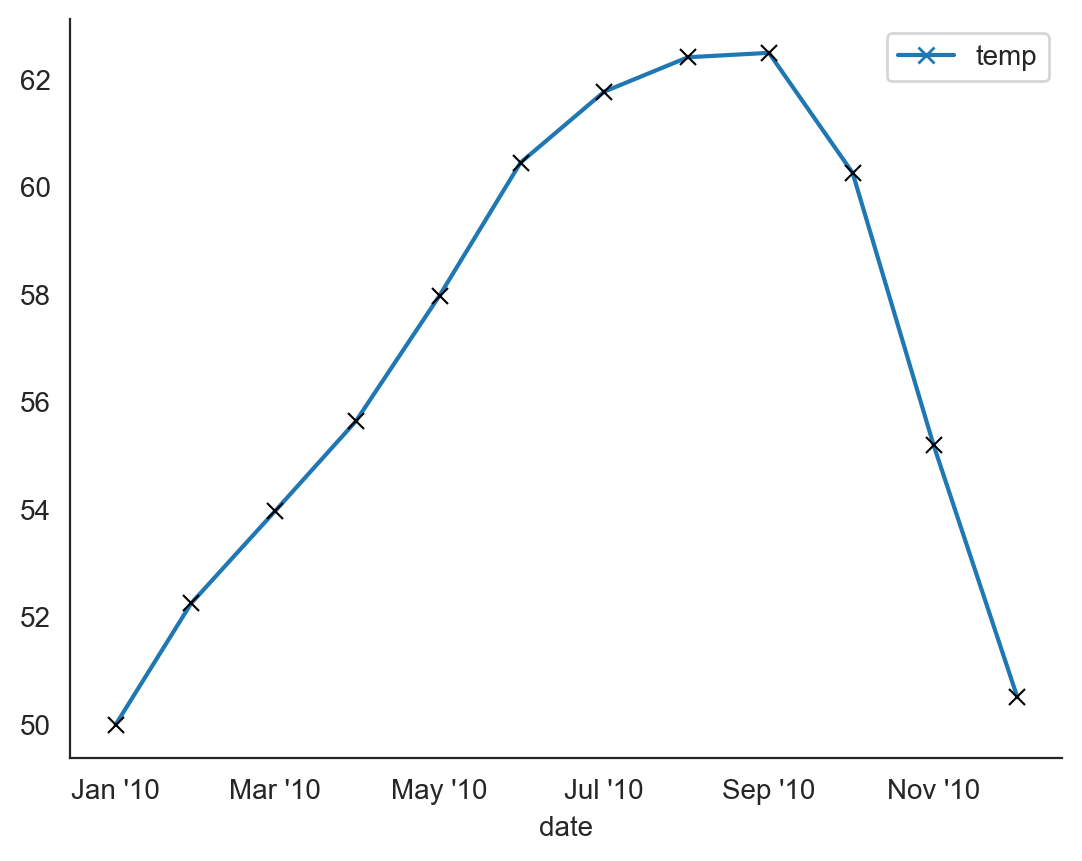

In [55]:
sns.lineplot(data=df_monthly_avg, markers='x',
              markeredgecolor='black')
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)

sns.despine()

**5. Which month has the highest average temperature?**

- January

**6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [57]:
df_min_max = df.resample('D').agg(['min', 'max'])

In [62]:
df_min_max['range'] = df_min_max.iloc[:,1] - df_min_max.iloc[:,0]

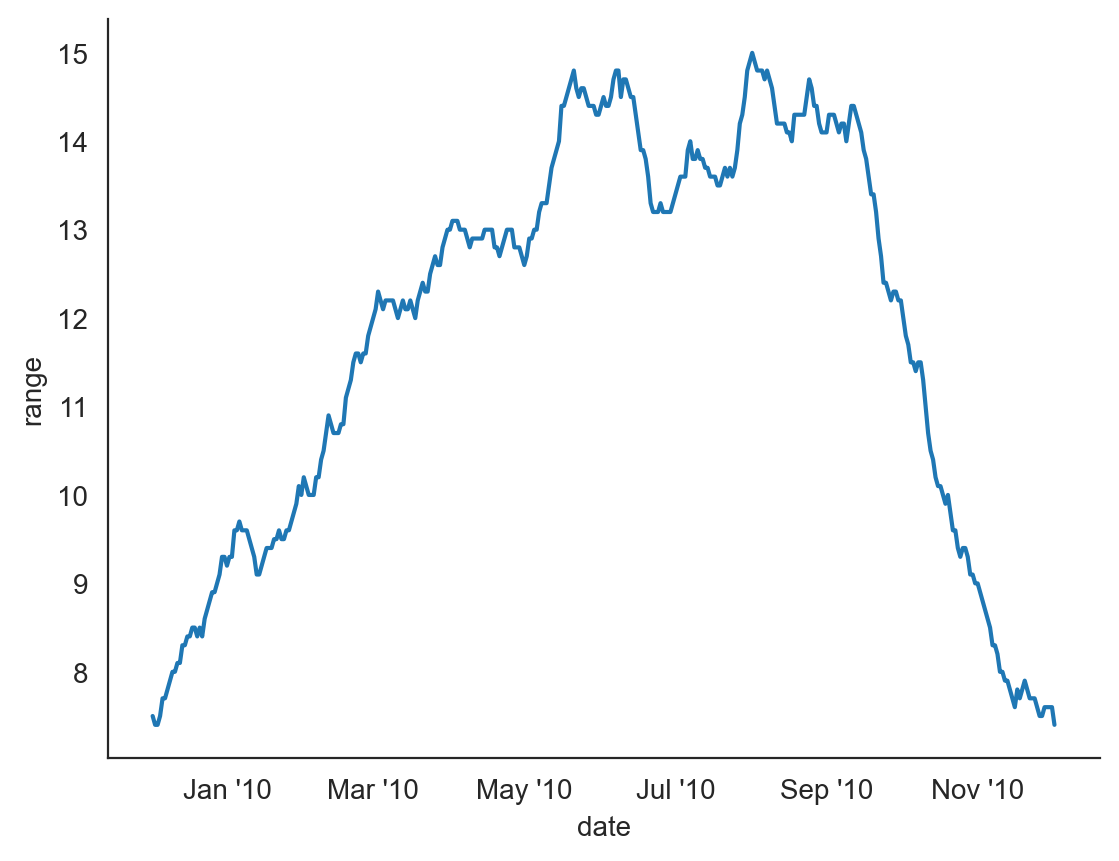

In [64]:
sns.lineplot(data=df_min_max.iloc[:,2], 
             markers='x',
              markeredgecolor='black')
plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)
plt.ylabel('range')
sns.despine()

**7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.**

In [65]:
df_min

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


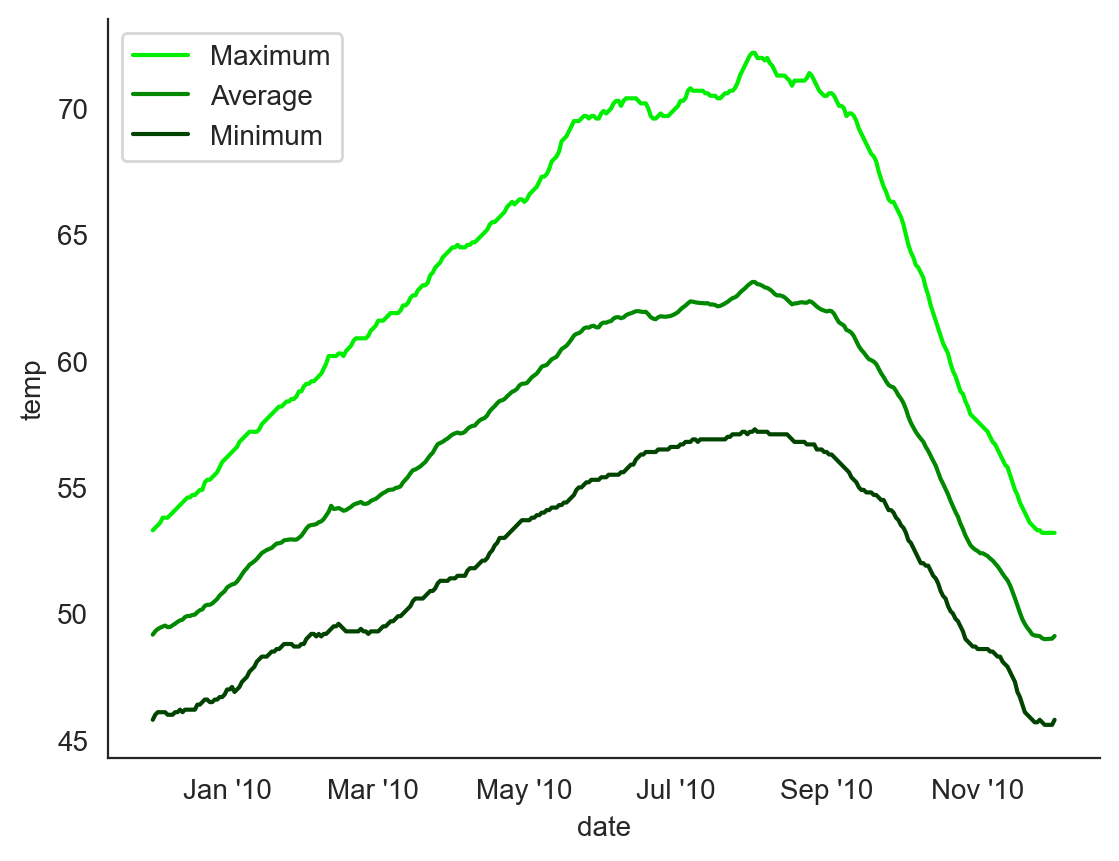

In [83]:

# Plot the maximum line with black color (#000000)
sns.lineplot(data=df_max, x='date', y='temp', color='#00EE00', label='Maximum')

# Plot the average line with green color (#009900)
sns.lineplot(data=df_avg, x='date', y='temp', color='#008800', label='Average')

# Plot the minimum line with blue color (#000044)
sns.lineplot(data=df_min, x='date', y='temp', color='#004400', label='Minimum')


plt.xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M'),
           pd.date_range(start=df.index.min(), end=df.index.max(), freq='2M').strftime('%b \'%y'),
           rotation=0)
sns.despine()

In [84]:
from datetime import datetime

In [126]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')

In [133]:
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [136]:
df['date'].astype('datetime64')

0    2022-03-27
1    2022-05-22
2    2022-05-16
3    2022-08-22
4    2022-03-15
        ...    
95   2022-01-04
96   2022-03-24
97   2022-08-28
98   2022-01-31
99   2022-05-16
Name: date, Length: 100, dtype: datetime64[ns]